In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils.random import sample_without_replacement


In [0]:
!pip install mlxtend --upgrade
!pip install shap
!pip install lime
!pip install mlxtend --upgrade 


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.0)
Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.0)


In [0]:
from lime.lime_tabular import LimeTabularExplainer
import shap
from mlxtend.regressor import StackingRegressor
from mlxtend.frequent_patterns import apriori, association_rules

In [0]:
data=pd.read_csv('BlackFriday.csv')

In [0]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


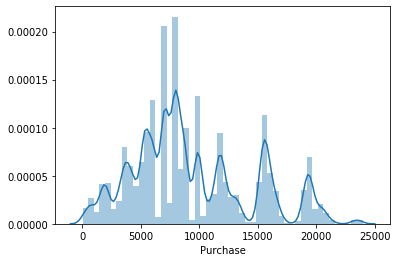

In [0]:
sns.distplot(data['Purchase'])

In [0]:
data.groupby(['User_ID','Gender'], as_index=False).count()[['Gender']]


,Gender
0,F
1,M
2,M
3,M
4,M
...,...
5886,F
5887,F
5888,F
5889,F


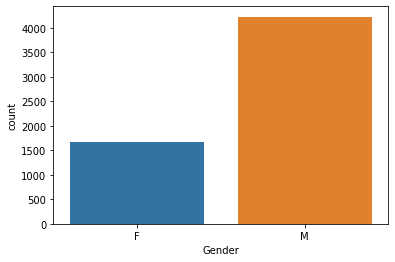

In [0]:
sns.countplot(data.groupby(['User_ID','Gender'], as_index=False).count()['Gender'])

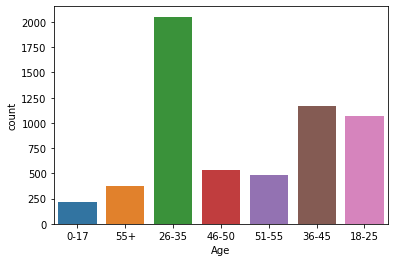

In [0]:
sns.countplot(data.groupby(['User_ID','Age'], as_index=False).count()['Age'])

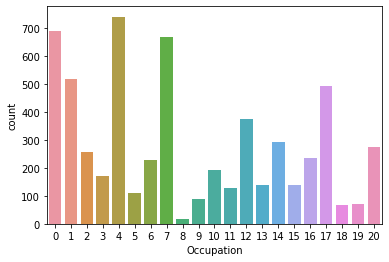

In [0]:
sns.countplot(data.groupby(['User_ID','Occupation'], as_index=False).count()['Occupation'])

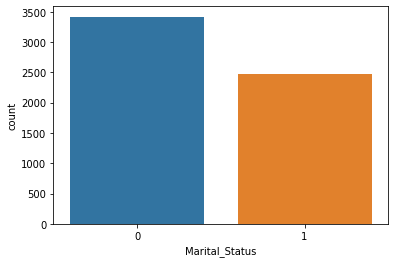

In [0]:
sns.countplot(data.groupby(['User_ID','Marital_Status'], as_index=False).count()['Marital_Status'])

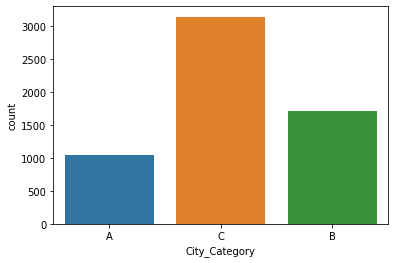

In [0]:
sns.countplot(data.groupby(['User_ID','City_Category'], as_index=False).count()['City_Category'])

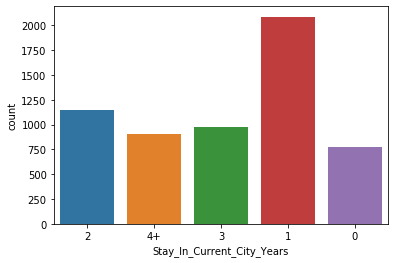

In [0]:
sns.countplot(data.groupby(['User_ID','Stay_In_Current_City_Years'], as_index=False).count()['Stay_In_Current_City_Years'])

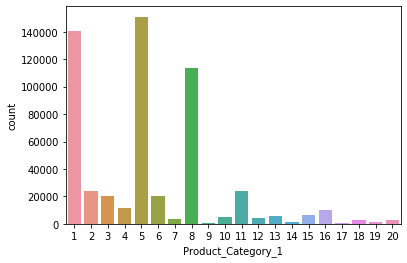

In [0]:
sns.countplot(data['Product_Category_1'])

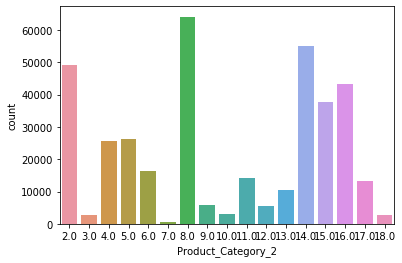

In [0]:
sns.countplot(data['Product_Category_2'])

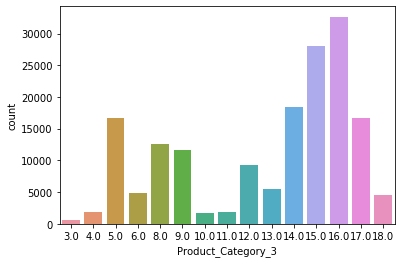

In [0]:
sns.countplot(data['Product_Category_3'])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
data.groupby(['User_ID','Gender'])[['Purchase']].sum()

,,Purchase
User_ID,Gender,
1000001,F,334093
1000002,M,810472
1000003,M,341635
1000004,M,206468
1000005,M,821001
...,...,...
1006036,F,4116058
1006037,F,1119538
1006038,F,90034


In [0]:
data.groupby(['Gender'], as_index=False)[['Purchase']].sum()

,Gender,Purchase
0,F,1186232642
1,M,3909580100


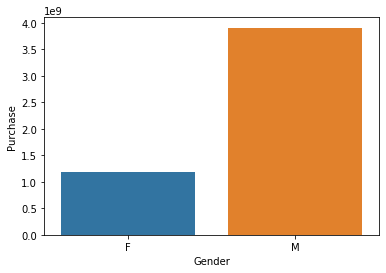

In [0]:
sns.barplot(x='Gender',y='Purchase',data=data.groupby(['Gender'], as_index=False)['Purchase'].sum())

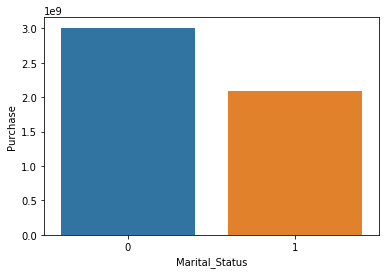

In [0]:
sns.barplot(x='Marital_Status',y='Purchase',data=data.groupby(['Marital_Status'], as_index=False)['Purchase'].sum())

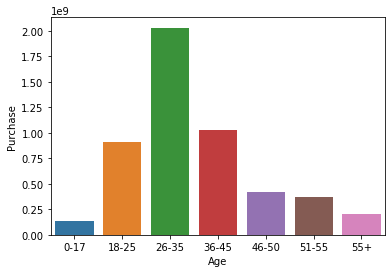

In [0]:
sns.barplot(x='Age',y='Purchase',data=data.groupby(['Age'], as_index=False)['Purchase'].sum())

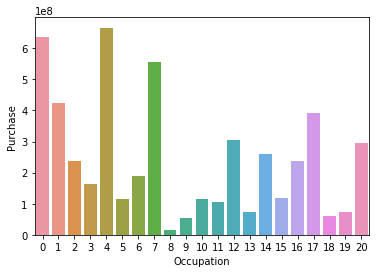

In [0]:
sns.barplot(x='Occupation',y='Purchase',data=data.groupby(['Occupation'], as_index=False)['Purchase'].sum())

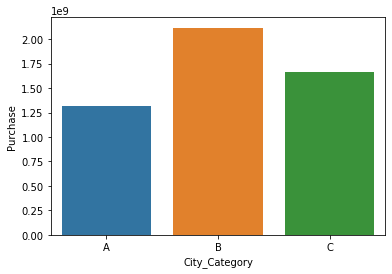

In [0]:
sns.barplot(x='City_Category',y='Purchase',data=data.groupby(['City_Category'], as_index=False)['Purchase'].sum())

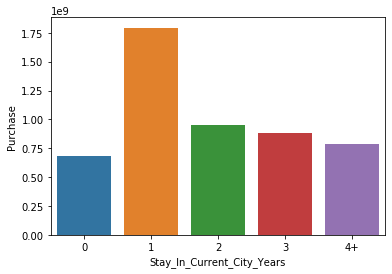

In [0]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=data.groupby(['Stay_In_Current_City_Years'], as_index=False)['Purchase'].sum())

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


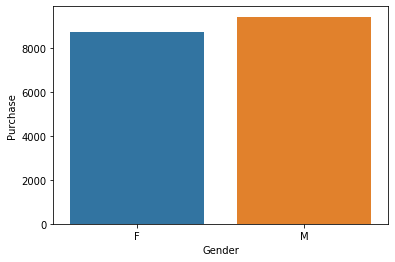

In [0]:
sns.barplot(x='Gender',y='Purchase',data=data.groupby(['Gender'], as_index=False)['Purchase'].mean())


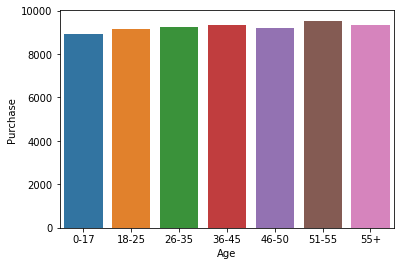

In [0]:
sns.barplot(x='Age',y='Purchase',data=data.groupby(['Age'], as_index=False)['Purchase'].mean())


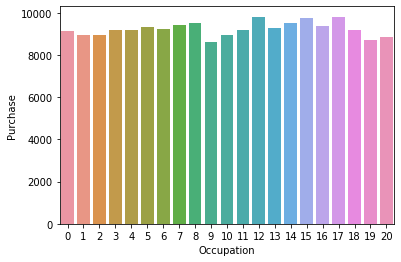

In [0]:
sns.barplot(x='Occupation',y='Purchase',data=data.groupby(['Occupation'], as_index=False)['Purchase'].mean())


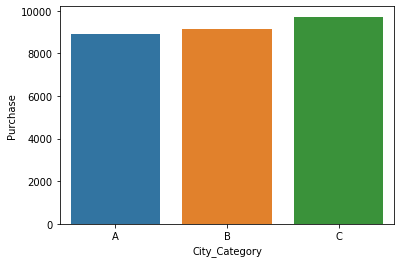

In [0]:
sns.barplot(x='City_Category',y='Purchase',data=data.groupby(['City_Category'], as_index=False)['Purchase'].mean())


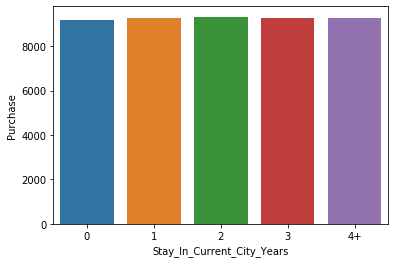

In [0]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=data.groupby(['Stay_In_Current_City_Years'], as_index=False)['Purchase'].mean())


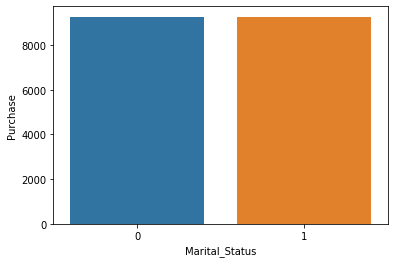

In [0]:
sns.barplot(x='Marital_Status',y='Purchase',data=data.groupby(['Marital_Status'], as_index=False)['Purchase'].mean())


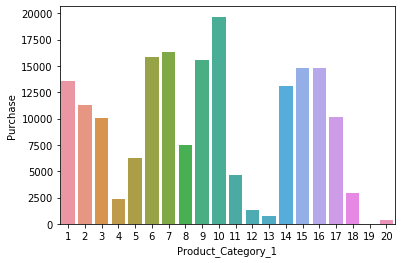

In [0]:
sns.barplot(x='Product_Category_1',y='Purchase',data=data.groupby(['Product_Category_1'], as_index=False)['Purchase'].mean())


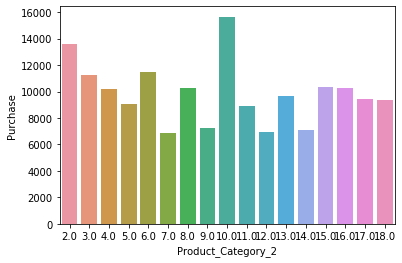

In [0]:
sns.barplot(x='Product_Category_2',y='Purchase',data=data.groupby(['Product_Category_2'], as_index=False)['Purchase'].mean())


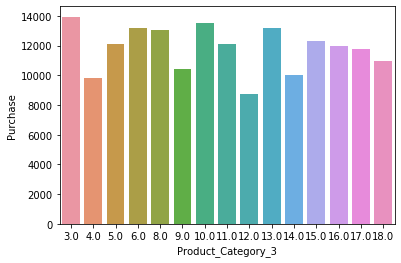

In [0]:
sns.barplot(x='Product_Category_3',y='Purchase',data=data.groupby(['Product_Category_3'], as_index=False)['Purchase'].mean())


In [0]:


data.head()
data.isnull().sum()
data.describe()
data.info()
data['Gender'].nunique()
data['City_Category'].nunique()

le = preprocessing.LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

le2 = preprocessing.LabelEncoder()
data['Product_ID']=le2.fit_transform(data['Product_ID'])
le3 = preprocessing.LabelEncoder()
data['User_ID']=le3.fit_transform(data['User_ID'])

one_hot2 = pd.get_dummies(data['City_Category'])
data = data.drop('City_Category',axis = 1)
data = data.join(one_hot2)
data = data.drop('C',axis = 1)

data.info()


data.rename(columns={'A':'City A'}, inplace=True)

data.rename(columns={'B':'City B'}, inplace=True)

data.info()

data['Age'].nunique()


data['AgeInCodes'] = pd.Categorical(data['Age']).codes


data = data.drop('Age',axis = 1)
data.info()

data['Stay_In_Current_City_YearsInCodes'] = pd.Categorical(data['Stay_In_Current_City_Years']).codes


data.info()
#data[['Stay_In_Current_City_Years','Stay_In_Current_City_YearsInCodes']].head(10)

#data.rename(columns={'Product_Category_1':'Product_Category'}, inplace=True)
data = data.drop('Stay_In_Current_City_Years',axis = 1)


data.info()
#data['Product_ID'].head()



data.info()
#data[['User_ID','Product_ID']].head(10)
data['Product_ID'].value_counts()
#data['Product_Count'] = data.groupby(['User_ID','Product_ID'])
data.info()

data['Product_Category_2']=data['Product_Category_2'].fillna(-1000)
data['Product_Category_3']=data['Product_Category_3'].fillna(-1000)


data.info()




df_frequency_map_userID = data.User_ID.value_counts().to_dict()
df_frequency_map_ProductID = data.Product_ID.value_counts().to_dict()
df_frequency_map_Occupation = data.Occupation.value_counts().to_dict()
df_frequency_map1 = data.Product_Category_1.value_counts().to_dict()
df_frequency_map2 = data.Product_Category_2.value_counts().to_dict()
df_frequency_map3 = data.Product_Category_3.value_counts().to_dict()
data['User_ID_Count'] = data['User_ID'].map(df_frequency_map_userID)
data['Product_ID_Count'] = data['Product_ID'].map(df_frequency_map_ProductID)
data['Occupation_Count']=data['Occupation'].map(df_frequency_map_Occupation)
data['Product_1_Count'] = data['Product_Category_1'].map(df_frequency_map1)
data['Product_2_Count'] = data['Product_Category_2'].map(df_frequency_map2)
data['Product_3_Count'] = data['Product_Category_3'].map(df_frequency_map3)

Y=data['Purchase']
X=data.drop('Purchase',axis=1)


trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25)

train=trainX.join(trainY)
train.info()


kf = KFold(n_splits = 20, shuffle = False)
def meanEncodingWithKFoldReg(x):
    col_mean_name = x + '_' + 'Kfold_Target_Enc'
    train[col_mean_name] = np.nan

    for tr_ind, val_ind in kf.split(train):
        X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
    #             print(tr_ind,val_ind)
        train.loc[train.index[val_ind], col_mean_name] = X_val[x].map(X_tr.groupby(x)['Purchase'].mean())


    mean_of_target=train['Purchase'].mean()
    train[col_mean_name].fillna(mean_of_target, inplace = True)

meanEncodingWithKFoldReg('User_ID')
meanEncodingWithKFoldReg('Product_ID')
meanEncodingWithKFoldReg('Occupation')

meanEncodingWithKFoldReg('Product_Category_1')
meanEncodingWithKFoldReg('Product_Category_2')
meanEncodingWithKFoldReg('Product_Category_3')
train.info()

train[train['User_ID']==0]['User_ID_Kfold_Target_Enc'].mean()

def meanEncodingForTestData(x,y):
    meann = train[[x,y]].groupby(x).mean().reset_index()
    meann = dict(zip(meann[x],meann[y] ))
    testX[y]=testX[x].map(meann)

train.info()
train[train['User_ID']==5273]['User_ID_Kfold_Target_Enc'].mean()
testX.head()
meanEncodingForTestData('User_ID','User_ID_Kfold_Target_Enc')
meanEncodingForTestData('Product_ID','Product_ID_Kfold_Target_Enc')
meanEncodingForTestData('Occupation','Occupation_Kfold_Target_Enc')
meanEncodingForTestData('Product_Category_1','Product_Category_1_Kfold_Target_Enc')
meanEncodingForTestData('Product_Category_2','Product_Category_2_Kfold_Target_Enc')
meanEncodingForTestData('Product_Category_3','Product_Category_3_Kfold_Target_Enc')

train[train['User_ID']==3696]['Product_3_Count']

testX.info()
testX['Product_ID_Kfold_Target_Enc']=testX['Product_ID_Kfold_Target_Enc'].fillna(testX['Product_ID_Kfold_Target_Enc'].mean())

trainY=train['Purchase']
trainX=train.drop('Purchase',axis=1)

train=trainX.join(trainY)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
trainX.shape

(412551, 24)

In [0]:
trainX.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City A,City B,AgeInCodes,Stay_In_Current_City_YearsInCodes,User_ID_Count,Product_ID_Count,Occupation_Count,Product_1_Count,Product_2_Count,Product_3_Count,User_ID_Kfold_Target_Enc,Product_ID_Kfold_Target_Enc,Occupation_Kfold_Target_Enc,Product_Category_1_Kfold_Target_Enc,Product_Category_2_Kfold_Target_Enc,Product_Category_3_Kfold_Target_Enc
385349,5182,1542,0,0,0,8,-1000.0,-1000.0,1,0,2,1,295,4,69638,113925,173638,383247,9170.466667,6751.333333,9135.062467,7491.536862,7516.229210,8221.943690
306303,5055,418,1,20,1,5,14.0,-1000.0,0,1,1,4,180,504,33562,150933,55108,383247,9895.376000,6649.080332,8819.789061,6241.426330,7093.681639,8221.943690
517033,1590,335,1,0,0,8,13.0,16.0,0,1,2,1,426,276,69638,113925,10531,32636,10391.932886,6720.115942,9135.062467,7491.536862,9690.077801,11976.198436
3210,512,518,1,0,0,16,-1000.0,-1000.0,1,0,1,0,558,89,69638,9828,173638,383247,9234.919897,8708.092593,9135.062467,14749.850648,7516.229210,8221.943690
286152,1963,2844,1,7,1,7,-1000.0,-1000.0,0,1,2,0,271,62,59133,3721,173638,383247,8584.489474,15665.439024,9433.892224,16380.686567,7516.229210,8221.943690


In [0]:
testX.shape

(137517, 24)

In [0]:
train.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City A,City B,AgeInCodes,Stay_In_Current_City_YearsInCodes,User_ID_Count,Product_ID_Count,Occupation_Count,Product_1_Count,Product_2_Count,Product_3_Count,User_ID_Kfold_Target_Enc,Product_ID_Kfold_Target_Enc,Occupation_Kfold_Target_Enc,Product_Category_1_Kfold_Target_Enc,Product_Category_2_Kfold_Target_Enc,Product_Category_3_Kfold_Target_Enc,Purchase
385349,5182,1542,0,0,0,8,-1000.0,-1000.0,1,0,2,1,295,4,69638,113925,173638,383247,9170.466667,6751.333333,9135.062467,7491.536862,7516.229210,8221.943690,9851
306303,5055,418,1,20,1,5,14.0,-1000.0,0,1,1,4,180,504,33562,150933,55108,383247,9895.376000,6649.080332,8819.789061,6241.426330,7093.681639,8221.943690,7007
517033,1590,335,1,0,0,8,13.0,16.0,0,1,2,1,426,276,69638,113925,10531,32636,10391.932886,6720.115942,9135.062467,7491.536862,9690.077801,11976.198436,3974
3210,512,518,1,0,0,16,-1000.0,-1000.0,1,0,1,0,558,89,69638,9828,173638,383247,9234.919897,8708.092593,9135.062467,14749.850648,7516.229210,8221.943690,8670
286152,1963,2844,1,7,1,7,-1000.0,-1000.0,0,1,2,0,271,62,59133,3721,173638,383247,8584.489474,15665.439024,9433.892224,16380.686567,7516.229210,8221.943690,16580


In [0]:
testgroup=testX.join(testY)

In [0]:
models={}

In [0]:
index = sample_without_replacement(n_population=len(train),n_samples=50000)
data_sample = train.iloc[index,:]

RUN THIS PART

In [0]:
lmCV = ElasticNet()
param_grid = { 'l1_ratio':[0.01,.1,1,10],'max_iter':[200,300,500],"alpha": [0.001, 0.01, 0.1, 1, 10],'fit_intercept':[True,False],'normalize':[True,False]}
CV_olsmodel = RandomizedSearchCV(n_iter=15,estimator=lmCV, param_distributions=param_grid,cv=5)
CV_olsmodel.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
print(CV_olsmodel.best_params_)
lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
lmCV.fit(trainX, trainY)

accuracies = cross_val_score(lmCV, data_sample.drop('Purchase',axis=1), data_sample['Purchase'], cv = 5)
r2Train=accuracies.mean()
r2Test=lmCV.score(testX,testY)
models['ElasticNet']={'r2Train':r2Train,'r2Test':r2Test}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136404970033.2209, tolerance: 446556862.1843
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135380530768.81793, tolerance: 446774379.39610004
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134981540653.10814, tolerance: 446494406.0752
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135309107908.54156,

{'normalize': False, 'max_iter': 500, 'l1_ratio': 1, 'fit_intercept': True, 'alpha': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1387538506178.3008, tolerance: 1042204483.7237864
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135561570877.05132, tolerance: 101650658.0329847
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134699562490.19121, tolerance: 102234385.2211889
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134286839945

In [0]:
r2Train=accuracies.mean()
r2Test=lmCV.score(testX,testY)
models['ElasticNet']={'r2Train':r2Train,'r2Test':r2Test}

In [0]:
print(CV_olsmodel.best_params_)

{'normalize': False, 'max_iter': 500, 'l1_ratio': 1, 'fit_intercept': True, 'alpha': 0.1}


In [0]:
models

{'ElasticNet': {'r2Test': 0.7344506651562563, 'r2Train': 0.7347949922064541}}

In [0]:
RForregCV=RandomForestRegressor()
param_grid = {'max_depth': [ 3,4., 5., 6.],'n_estimators': [100, 200,300]}
CV_rfmodel = RandomizedSearchCV(n_iter=7,estimator=RForregCV,param_distributions=param_grid, cv=5,n_jobs=-1)
CV_rfmodel.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
print(CV_rfmodel.best_params_)
RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
RForregCV.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
accuracies = cross_val_score(RForregCV, trainX, trainY, cv = 5,n_jobs=-1)
r2Train=accuracies.mean()
r2Test=RForregCV.score(testX,testY)
models['Random Forest Regressor']={'r2Train':r2Train,'r2Test':r2Test}


{'n_estimators': 100, 'max_depth': 6.0}


In [0]:
NNetRregCV = MLPRegressor(solver='adam')
param_grid = {'solver':['adam','lbfgs'],'hidden_layer_sizes': [(10,), (10,10,), (20,20,),(10,10,10,)],'alpha': [ 0.01, 0.1],'activation': [ "relu", "tanh"] }
CV_nnmodel = RandomizedSearchCV(n_iter=20,estimator=NNetRregCV,param_distributions=param_grid, cv=5,n_jobs=-1)
CV_nnmodel.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
print(CV_nnmodel.best_params_)
NNetRregCV = NNetRregCV.set_params(**CV_nnmodel.best_params_)
NNetRregCV.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
r2Train=accuracies.mean()
r2Test=RForregCV.score(testX,testY)

models['MLP Regressor']={'r2Train':r2Train,'r2Test':r2Test}


{'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'alpha': 0.1, 'activation': 'relu'}


In [0]:
print(CV_nnmodel.best_params_)


{'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'alpha': 0.1, 'activation': 'relu'}


In [0]:
print(CV_nnmodel.best_params_)


{'solver': 'lbfgs', 'hidden_layer_sizes': (10,), 'alpha': 0.1, 'activation': 'relu'}


In [0]:
models

{'ElasticNet': {'r2Test': 0.7344506651562563, 'r2Train': 0.7347949922064541},
 'MLP Regressor': {'r2Test': 0.7360284238291215, 'r2Train': 0.735661015076293},
 'Random Forest Regressor': {'r2Test': 0.7360284238291215,
  'r2Train': 0.735661015076293}}

In [0]:
GBoostregCV = GradientBoostingRegressor()
param_grid = {'max_depth': [ 3., 4., 5.,6],'subsample': [0.7, 0.8, 0.9],'n_estimators': [100,200,300],'learning_rate': [0.1, 0.2, 0.3]}
CV_gbmodel = RandomizedSearchCV(n_iter=10,estimator=GBoostregCV,param_distributions=param_grid, cv=5,n_jobs=-1)
CV_gbmodel.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
print(CV_gbmodel.best_params_)
GBoostregCV = GBoostregCV.set_params(**CV_gbmodel.best_params_)
GBoostregCV.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
accuracies = cross_val_score(GBoostregCV, data_sample.drop('Purchase',axis=1), data_sample['Purchase'], cv = 5,n_jobs=-1)
r2Train=accuracies.mean()
r2Test=GBoostregCV.score(testX,testY) 

models['Gradient Boosting Regressor']={'r2Train':r2Train,'r2Test':r2Test}

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 4.0, 'learning_rate': 0.2}


In [0]:
GBoostregCV = xgb.XGBRegressor(n_jobs=-1)
param_grid = {'learning_rate': [0.01,0.1, 0.2, 0.3],'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5,6],'n_estimators':[500,1000]}
CV_xbmodel = RandomizedSearchCV(n_iter=10,estimator=GBoostregCV,param_distributions=param_grid, cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
CV_xbmodel.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_s...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1

In [0]:
print(CV_xbmodel.best_params_)

{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}


In [0]:
GBoostregCV=xgb.XGBRegressor(subsample= 1.0,n_estimators= 500, min_child_weight= 10, max_depth= 5, gamma= 1, colsample_bytree= 0.6,learning_rate=0.1)
accuracies = cross_val_score(GBoostregCV, data_sample.drop('Purchase',axis=1), data_sample['Purchase'], cv = 3,n_jobs=-1)
GBoostregCV.fit(data_sample.drop('Purchase',axis=1), data_sample['Purchase'])
r2Train=accuracies.mean()
r2Test=GBoostregCV.score(testX,testY) 

models['Xtreme Gradient Boosting Regressor']={'r2Train':r2Train,'r2Test':r2Test}

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
pd.DataFrame.from_dict(models).T

,r2Train,r2Test
ElasticNet,0.734795,0.734451
Random Forest Regressor,0.735661,0.736028
MLP Regressor,0.735661,0.736028
Gradient Boosting Regressor,0.739108,0.740366
Xtreme Gradient Boosting Regressor,0.737581,0.741655


In [0]:
data_sample.shape

(50000, 25)

In [0]:
models

{'ElasticNet': {'r2Test': 0.7344506651562563, 'r2Train': 0.7347949922064541},
 'Gradient Boosting Regressor': {'r2Test': 0.7403664400457294,
  'r2Train': 0.7391077523699205},
 'MLP Regressor': {'r2Test': 0.7360284238291215, 'r2Train': 0.735661015076293},
 'Random Forest Regressor': {'r2Test': 0.7360284238291215,
  'r2Train': 0.735661015076293},
 'Xtreme Gradient Boosting Regressor': {'r2Test': 0.7416549224239973,
  'r2Train': 0.737581146320211}}

In [0]:
models

{'ElasticNet': {'r2Test': 0.7344506651562563, 'r2Train': 0.7347949922064541},
 'Gradient Boosting Regressor': {'r2Test': 0.7403664400457294,
  'r2Train': 0.7391077523699205},
 'MLP Regressor': {'r2Test': 0.7360284238291215, 'r2Train': 0.735661015076293},
 'Random Forest Regressor': {'r2Test': 0.7360284238291215,
  'r2Train': 0.735661015076293},
 'Xtreme Gradient Boosting Regressor': {'r2Test': 0.7416549224239973,
  'r2Train': 0.737581146320211}}

In [0]:
f=DecisionTreeRegressor()
f.fit(trainX,trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
feat_importance = f.feature_importances_

feature_cols = trainX.columns
feat_imp_dict = dict(zip(feature_cols, f.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
Product_ID_Kfold_Target_Enc,0.741621
User_ID_Kfold_Target_Enc,0.049412
User_ID_Count,0.024365
Occupation_Kfold_Target_Enc,0.022176
User_ID,0.022025
Product_Category_1_Kfold_Target_Enc,0.019425
Product_Category_2_Kfold_Target_Enc,0.018841
Product_Category_3_Kfold_Target_Enc,0.017138
Product_ID_Count,0.014217
Product_ID,0.013737


In [0]:
{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 0.6}

{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 10,
 'n_estimators': 500,
 'subsample': 1.0}

In [0]:
en = ElasticNet(l1_ratio=0.01, alpha = 0.001, max_iter=500, fit_intercept=True, normalize = True,copy_X=False)
nn=MLPRegressor(warm_start=True,shuffle=True,n_iter_no_change=73,solver='adam',early_stopping=True, max_iter=600,hidden_layer_sizes=(10,10,10,),alpha=0.1)
rf=RandomForestRegressor(n_jobs = -1, n_estimators = 100, max_features = 0.49, max_depth = 6, min_samples_leaf = 2)
gbm=GradientBoostingRegressor(subsample = 0.7, max_depth = 5,n_estimators=100,learning_rate=0.2)
xgbr=xgb.XGBRegressor(learning_rate =0.01,n_estimators=1000,max_depth=6,min_child_weight=10,gamma=1,subsample=0.8,colsample_bytree=0.6,nthread=-1)


stack = StackingRegressor(verbose=True,regressors=[en, nn,rf,gbm],meta_regressor=xgbr, use_features_in_secondary=True)
# Training the stacking classifier

stack.fit(trainX, trainY)

# Evaluate and visualize the fit

print("Root Mean Squared Error: %.4f" % np.sqrt(np.mean((stack.predict(testX) - testY) ** 2)))
print('Variance Score: %.4f' % stack.score(testX, testY))


Fitting 4 regressors...
Fitting regressor1: elasticnet (1/4)
Fitting regressor2: mlpregressor (2/4)
Fitting regressor3: randomforestregressor (3/4)
Fitting regressor4: gradientboostingregressor (4/4)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:53:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 2516.7569
Variance Score: 0.7480


In [0]:
models['Ensemble']={'r2Train':stack.score(trainX, trainY),'r2Test':stack.score(testX, testY)}

In [0]:
pd.DataFrame.from_dict(models).T

,r2Train,r2Test
ElasticNet,0.734795,0.734451
Random Forest Regressor,0.735661,0.736028
MLP Regressor,0.735661,0.736028
Gradient Boosting Regressor,0.739108,0.740366
Xtreme Gradient Boosting Regressor,0.737581,0.741655
Ensemble,0.762917,0.748008


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17494e-27): result may not be accurate.
  overwrite_a=True).T


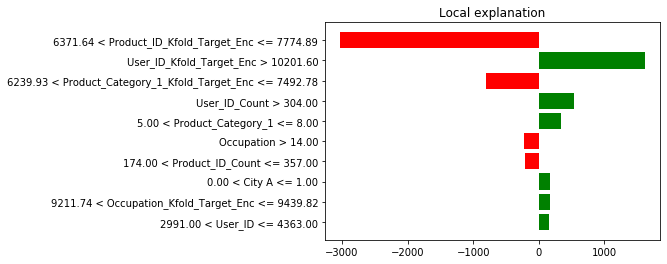

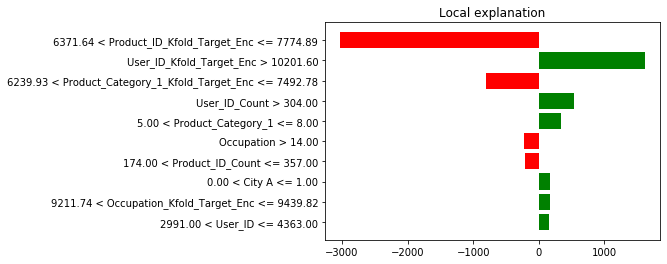

In [0]:
explainer = LimeTabularExplainer(trainX.values,feature_names = trainX.columns,mode='regression', random_state=1)
exp = explainer.explain_instance(testX.iloc[10, :], stack.predict)
exp.as_list()
exp.as_pyplot_figure()

In [0]:
x=GradientBoostingRegressor()
x.fit(trainX,trainY)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
shap_explainer = shap.TreeExplainer(x)
test_shap_vals = shap_explainer.shap_values(testX)
#shap.summary_plot(test_shap_vals, testX)
shap.initjs()
# Calculate Shap values


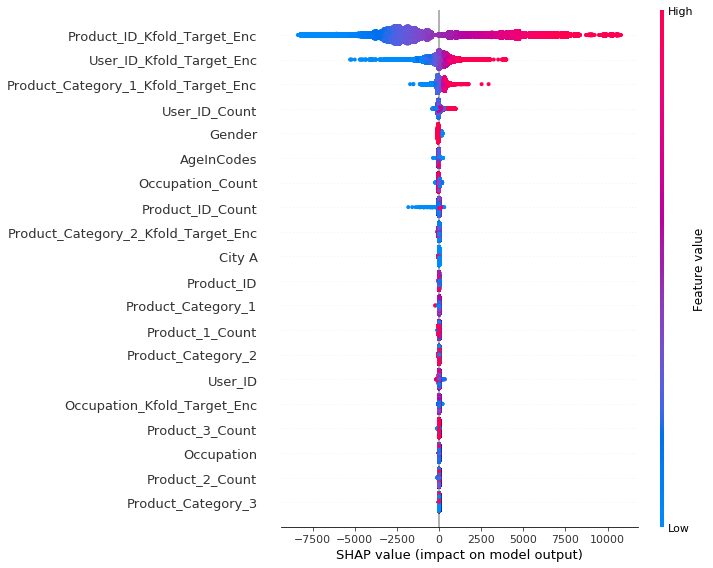

In [0]:
shap.summary_plot(test_shap_vals, testX)

In [0]:
dfApriori = pd.crosstab(data.User_ID, data.Product_ID).astype('bool').astype('int')
freq = apriori(dfApriori, min_support = 0.05, use_colnames = True)
rules = association_rules(freq, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [0]:
rules[['antecedents','consequents','confidence','lift']].head(5)

,antecedents,consequents,confidence,lift
3157,"(1355, 2591)",(565),0.562617,2.254677
2459,(3157),(1058),0.526836,2.634628
2680,(1200),(1355),0.522968,2.191185
516,(3320),(249),0.522766,1.906881
3151,"(1016, 2263)",(249),0.522046,1.904255
